In [1]:
from llm_call import get_response

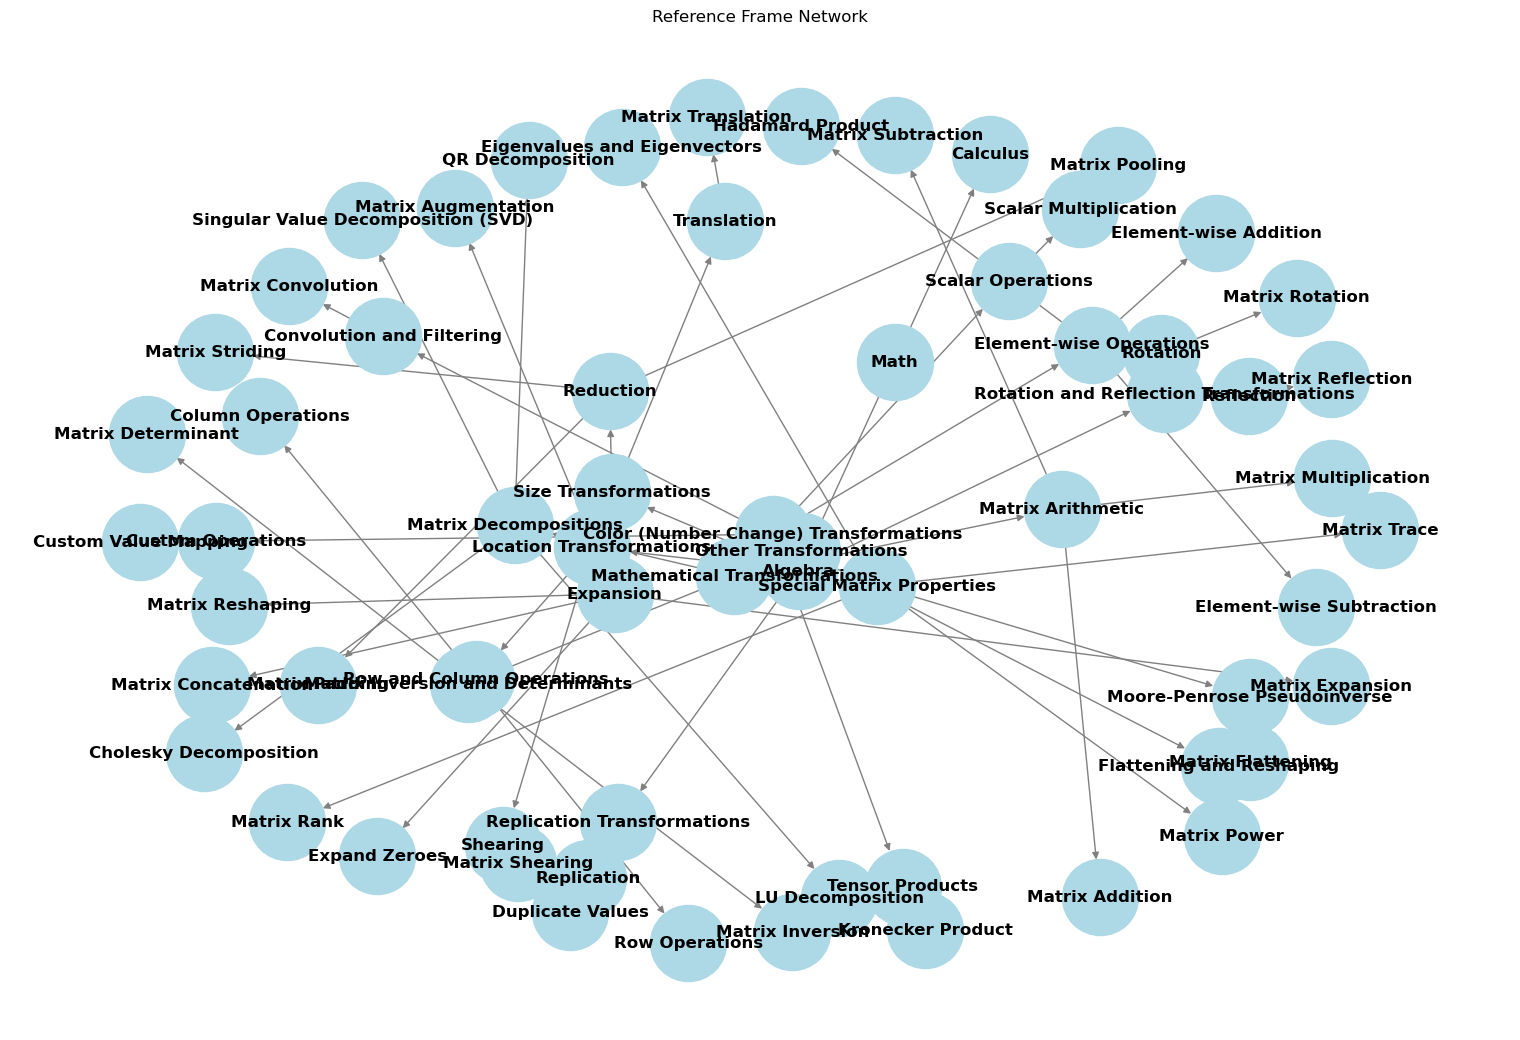

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

class ReferenceFrame:
    def __init__(self, name):
        self.name = name
        self.information = ""
        self.metadata = {}
        self.annotations = []
        self.children = {}
        self.parents = {}

    def add_child(self, child_frame):
        self.children[child_frame.name] = child_frame
        child_frame.parents[self.name] = self

    def add_parent(self, parent_frame):
        self.parents[parent_frame.name] = parent_frame
        parent_frame.children[self.name] = self

    def add_information(self, info):
        self.information += " " + info

    def get_information(self):
        return self.information

    def add_metadata(self, key, value):
        self.metadata[key] = value

    def add_annotation(self, annotation):
        self.annotations.append(annotation)

    def navigate_to_child(self, child_name):
        return self.children.get(child_name, None)

    def navigate_to_parent(self, parent_name):
        return self.parents.get(parent_name, None)

class ReferenceFrameNetwork:
    def __init__(self):
        self.frames = {}

    def add_frame(self, frame_name):
        if frame_name not in self.frames:
            self.frames[frame_name] = ReferenceFrame(frame_name)
        return self.frames[frame_name]

    def get_frame(self, frame_name):
        return self.frames.get(frame_name, None)

    def add_information_to_frame(self, frame_name, info):
        frame = self.get_frame(frame_name)
        if frame:
            frame.add_information(info)

    def link_frames(self, parent_name, child_name):
        parent_frame = self.add_frame(parent_name)
        child_frame = self.add_frame(child_name)
        parent_frame.add_child(child_frame)

    def generate_graph(self):
        graph = nx.DiGraph()
        for frame_name, frame in self.frames.items():
            for child_name in frame.children:
                graph.add_edge(frame_name, child_name)
        return graph

    def visualize_graph(self):
        graph = self.generate_graph()
        pos = nx.spring_layout(graph)
        plt.figure(figsize=(15, 10))
        nx.draw(graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=12, font_weight='bold')
        plt.title("Reference Frame Network")
        plt.show()

# Create the reference frame network
network = ReferenceFrameNetwork()

# Add initial nodes for different subjects
network.add_frame("Math")
network.add_frame("Science")

# Add sub-nodes under Math
network.add_information_to_frame("Algebra", "Algebra is the study of mathematical symbols and the rules for manipulating these symbols.")
network.add_information_to_frame("Calculus", "Calculus is the mathematical study of continuous change.")
network.link_frames("Math", "Algebra")
network.link_frames("Math", "Calculus")

# Add sub-nodes under Algebra (Matrix Transformations)
categories = {
    "Size Transformations": {
        "Expansion": [
            "Matrix Reshaping",
            "Matrix Expansion",
            "Matrix Augmentation",
            "Matrix Concatenation",
            "Expand Zeroes"
        ],
        "Reduction": [
            "Matrix Pooling",
            "Matrix Striding",
            "Matrix Padding"
        ]
    },
    "Rotation and Reflection Transformations": {
        "Rotation": ["Matrix Rotation"],
        "Reflection": ["Matrix Reflection"]
    },
    "Location Transformations": {
        "Translation": ["Matrix Translation"],
        "Shearing": ["Matrix Shearing"],
        "Row and Column Operations": [
            "Row Operations",
            "Column Operations"
        ]
    },
    "Color (Number Change) Transformations": {
        "Scalar Operations": ["Scalar Multiplication"],
        "Element-wise Operations": [
            "Element-wise Addition",
            "Element-wise Subtraction",
            "Hadamard Product"
        ],
        "Tensor Products": ["Kronecker Product"],
        "Custom Operations": [
            "Custom Value Mapping"
        ]
    },
    "Replication Transformations": {
        "Replication": [
            "Duplicate Values"
        ]
    },
    "Mathematical Transformations": {
        "Matrix Arithmetic": [
            "Matrix Addition",
            "Matrix Subtraction",
            "Matrix Multiplication"
        ],
        "Matrix Inversion and Determinants": [
            "Matrix Inversion",
            "Matrix Determinant"
        ],
        "Matrix Decompositions": [
            "Singular Value Decomposition (SVD)",
            "QR Decomposition",
            "LU Decomposition",
            "Cholesky Decomposition"
        ],
        "Special Matrix Properties": [
            "Matrix Rank",
            "Matrix Trace",
            "Eigenvalues and Eigenvectors",
            "Matrix Power",
            "Moore-Penrose Pseudoinverse"
        ]
    },
    "Other Transformations": {
        "Flattening and Reshaping": ["Matrix Flattening"],
        "Convolution and Filtering": ["Matrix Convolution"]
    }
}

transformation_descriptions = {
    "Matrix Addition": "Matrix addition is the operation of adding two matrices by adding the corresponding entries together.",
    "Matrix Subtraction": "Matrix subtraction is the operation of subtracting the corresponding entries of two matrices.",
    "Scalar Multiplication": "Scalar multiplication involves multiplying each entry of a matrix by a scalar value.",
    "Matrix Multiplication": "Matrix multiplication is the operation of multiplying two matrices by taking the dot product of rows and columns.",
    "Matrix Transpose": "The transpose of a matrix is obtained by swapping its rows and columns.",
    "Matrix Inversion": "The inverse of a matrix A is a matrix B such that AB = BA = I, where I is the identity matrix.",
    "Matrix Determinant": "The determinant is a scalar value that can be computed from the elements of a square matrix and encodes certain properties of the matrix.",
    "Matrix Rank": "The rank of a matrix is the dimension of the vector space generated by its columns.",
    "Matrix Trace": "The trace of a matrix is the sum of its diagonal elements.",
    "Eigenvalues and Eigenvectors": "Eigenvalues are scalars associated with a square matrix that satisfy the equation Ax = λx, where x is a non-zero vector and λ is a scalar. Eigenvectors are the corresponding vectors.",
    "Singular Value Decomposition (SVD)": "Singular value decomposition is a factorization of a matrix into three matrices U, Σ, and V such that A = UΣV^T.",
    "QR Decomposition": "QR decomposition is a factorization of a matrix into an orthogonal matrix Q and an upper triangular matrix R.",
    "LU Decomposition": "LU decomposition is the factorization of a matrix into a lower triangular matrix L and an upper triangular matrix U.",
    "Cholesky Decomposition": "Cholesky decomposition is the factorization of a positive-definite matrix into the product of a lower triangular matrix and its conjugate transpose.",
    "Matrix Power": "Matrix power is the operation of raising a matrix to a given integer power.",
    "Hadamard Product": "Hadamard product is the element-wise multiplication of two matrices.",
    "Kronecker Product": "Kronecker product is the tensor product of two matrices.",
    "Moore-Penrose Pseudoinverse": "The Moore-Penrose pseudoinverse is a generalization of the matrix inverse that can be applied to non-square matrices.",
    "Row Operations": "Row operations include row addition, row multiplication, and row swapping.",
    "Column Operations": "Column operations include column addition, column multiplication, and column swapping.",
    "Element-wise Addition": "Element-wise addition involves adding two matrices by adding the corresponding entries.",
    "Element-wise Subtraction": "Element-wise subtraction involves subtracting the corresponding entries of two matrices.",
    "Element-wise Operations": "Element-wise operations include addition, subtraction, multiplication, and division applied to each element of the matrix.",
    "Matrix Reshaping": "Matrix reshaping is the operation of changing the shape of a matrix without changing its data.",
    "Matrix Flattening": "Matrix flattening is the operation of converting a matrix into a single row or column.",
    "Matrix Rotation": "Matrix rotation involves rotating the elements of the matrix in a specified direction.",
    "Matrix Reflection": "Matrix reflection involves reflecting the matrix elements across a specified axis.",
    "Matrix Scaling": "Matrix scaling involves multiplying the matrix by a scalar to change its size.",
    "Matrix Translation": "Matrix translation involves shifting the matrix elements by a specified amount.",
    "Matrix Shearing": "Matrix shearing involves distorting the matrix elements by a specified factor.",
    "Matrix Augmentation": "Matrix augmentation involves appending additional rows or columns to a matrix.",
    "Matrix Concatenation": "Matrix concatenation involves joining two matrices along a specified axis.",
    "Matrix Padding": "Matrix padding involves adding zeros or other values around the edges of a matrix.",
    "Matrix Striding": "Matrix striding involves taking steps of a specified size within the matrix.",
    "Matrix Expansion": "Matrix expansion involves enlarging the matrix by replicating its elements.",
    "Matrix Convolution": "Matrix convolution involves applying a filter to the matrix elements to produce a transformed matrix.",
    "Matrix Pooling": "Matrix pooling involves reducing the matrix size by taking the maximum, minimum, or average of its elements within a specified window.",
    "Custom Value Mapping": "Custom value mapping involves transforming matrix values based on a predefined mapping function.",
    "Duplicate Values": "Duplicate Values is the operation of duplicating specific values in the matrix with another matrix.",
    "Expand Zeroes": "Expand Zeroes is the operation of expanding each zero in the input matrix to a block of zeroes of specified size."
}

# Adding categories and their subcategories to the network
for category, subcategories in categories.items():
    network.add_frame(category)
    network.link_frames("Algebra", category)
    for subcategory, transformations in subcategories.items():
        network.add_frame(subcategory)
        network.link_frames(category, subcategory)
        for transformation in transformations:
            network.add_information_to_frame(transformation, transformation_descriptions[transformation])
            network.link_frames(subcategory, transformation)

# Visualize the reference frame network graph
network.visualize_graph()


In [5]:
from navigation_frames import navigate_reference_frames

# Example usage:
matrix1 = [
    [0, 7, 7],
    [7, 7, 7],
    [0, 7, 7]
]
matrix2 = [
    [0, 0, 0, 0, 7, 7, 0, 7, 7],
    [0, 0, 0, 7, 7, 7, 7, 7, 7],
    [0, 0, 0, 0, 7, 7, 0, 7, 7],
    [0, 7, 7, 0, 7, 7, 0, 7, 7],
    [7, 7, 7, 7, 7, 7, 7, 7, 7],
    [0, 7, 7, 0, 7, 7, 0, 7, 7],
    [0, 0, 0, 0, 7, 7, 0, 7, 7],
    [0, 0, 0, 7, 7, 7, 7, 7, 7],
    [0, 0, 0, 0, 7, 7, 0, 7, 7]
]

result = navigate_reference_frames(network, matrix1, matrix2)
print(result)

Math
Algebra
['Size Transformations', 'Replication Transformations']
['Size Transformations', 'Location Transformations', 'Replication Transformations']
Series of sub-categories identified and added: ['Size Transformations', 'Location Transformations', 'Replication Transformations']


In [6]:
from solver_func import Solver2
import numpy as np

# Example usage:
solver = Solver2(network)
matrix1 = np.array([
    [0, 7, 7],
    [7, 7, 7],
    [0, 7, 7]
])
matrix2 = np.array([
    [0, 0, 0, 0, 7, 7, 0, 7, 7],
    [0, 0, 0, 7, 7, 7, 7, 7, 7],
    [0, 0, 0, 0, 7, 7, 0, 7, 7],
    [0, 7, 7, 0, 7, 7, 0, 7, 7],
    [7, 7, 7, 7, 7, 7, 7, 7, 7],
    [0, 7, 7, 0, 7, 7, 0, 7, 7],
    [0, 0, 0, 0, 7, 7, 0, 7, 7],
    [0, 0, 0, 7, 7, 7, 7, 7, 7],
    [0, 0, 0, 0, 7, 7, 0, 7, 7]
])
categories = ['Size Transformations', 'Replication Transformations']
result = solver.solve(matrix1, matrix2, categories)
print(result)

Transformation <lambda> from Replication in Replication Transformations works.


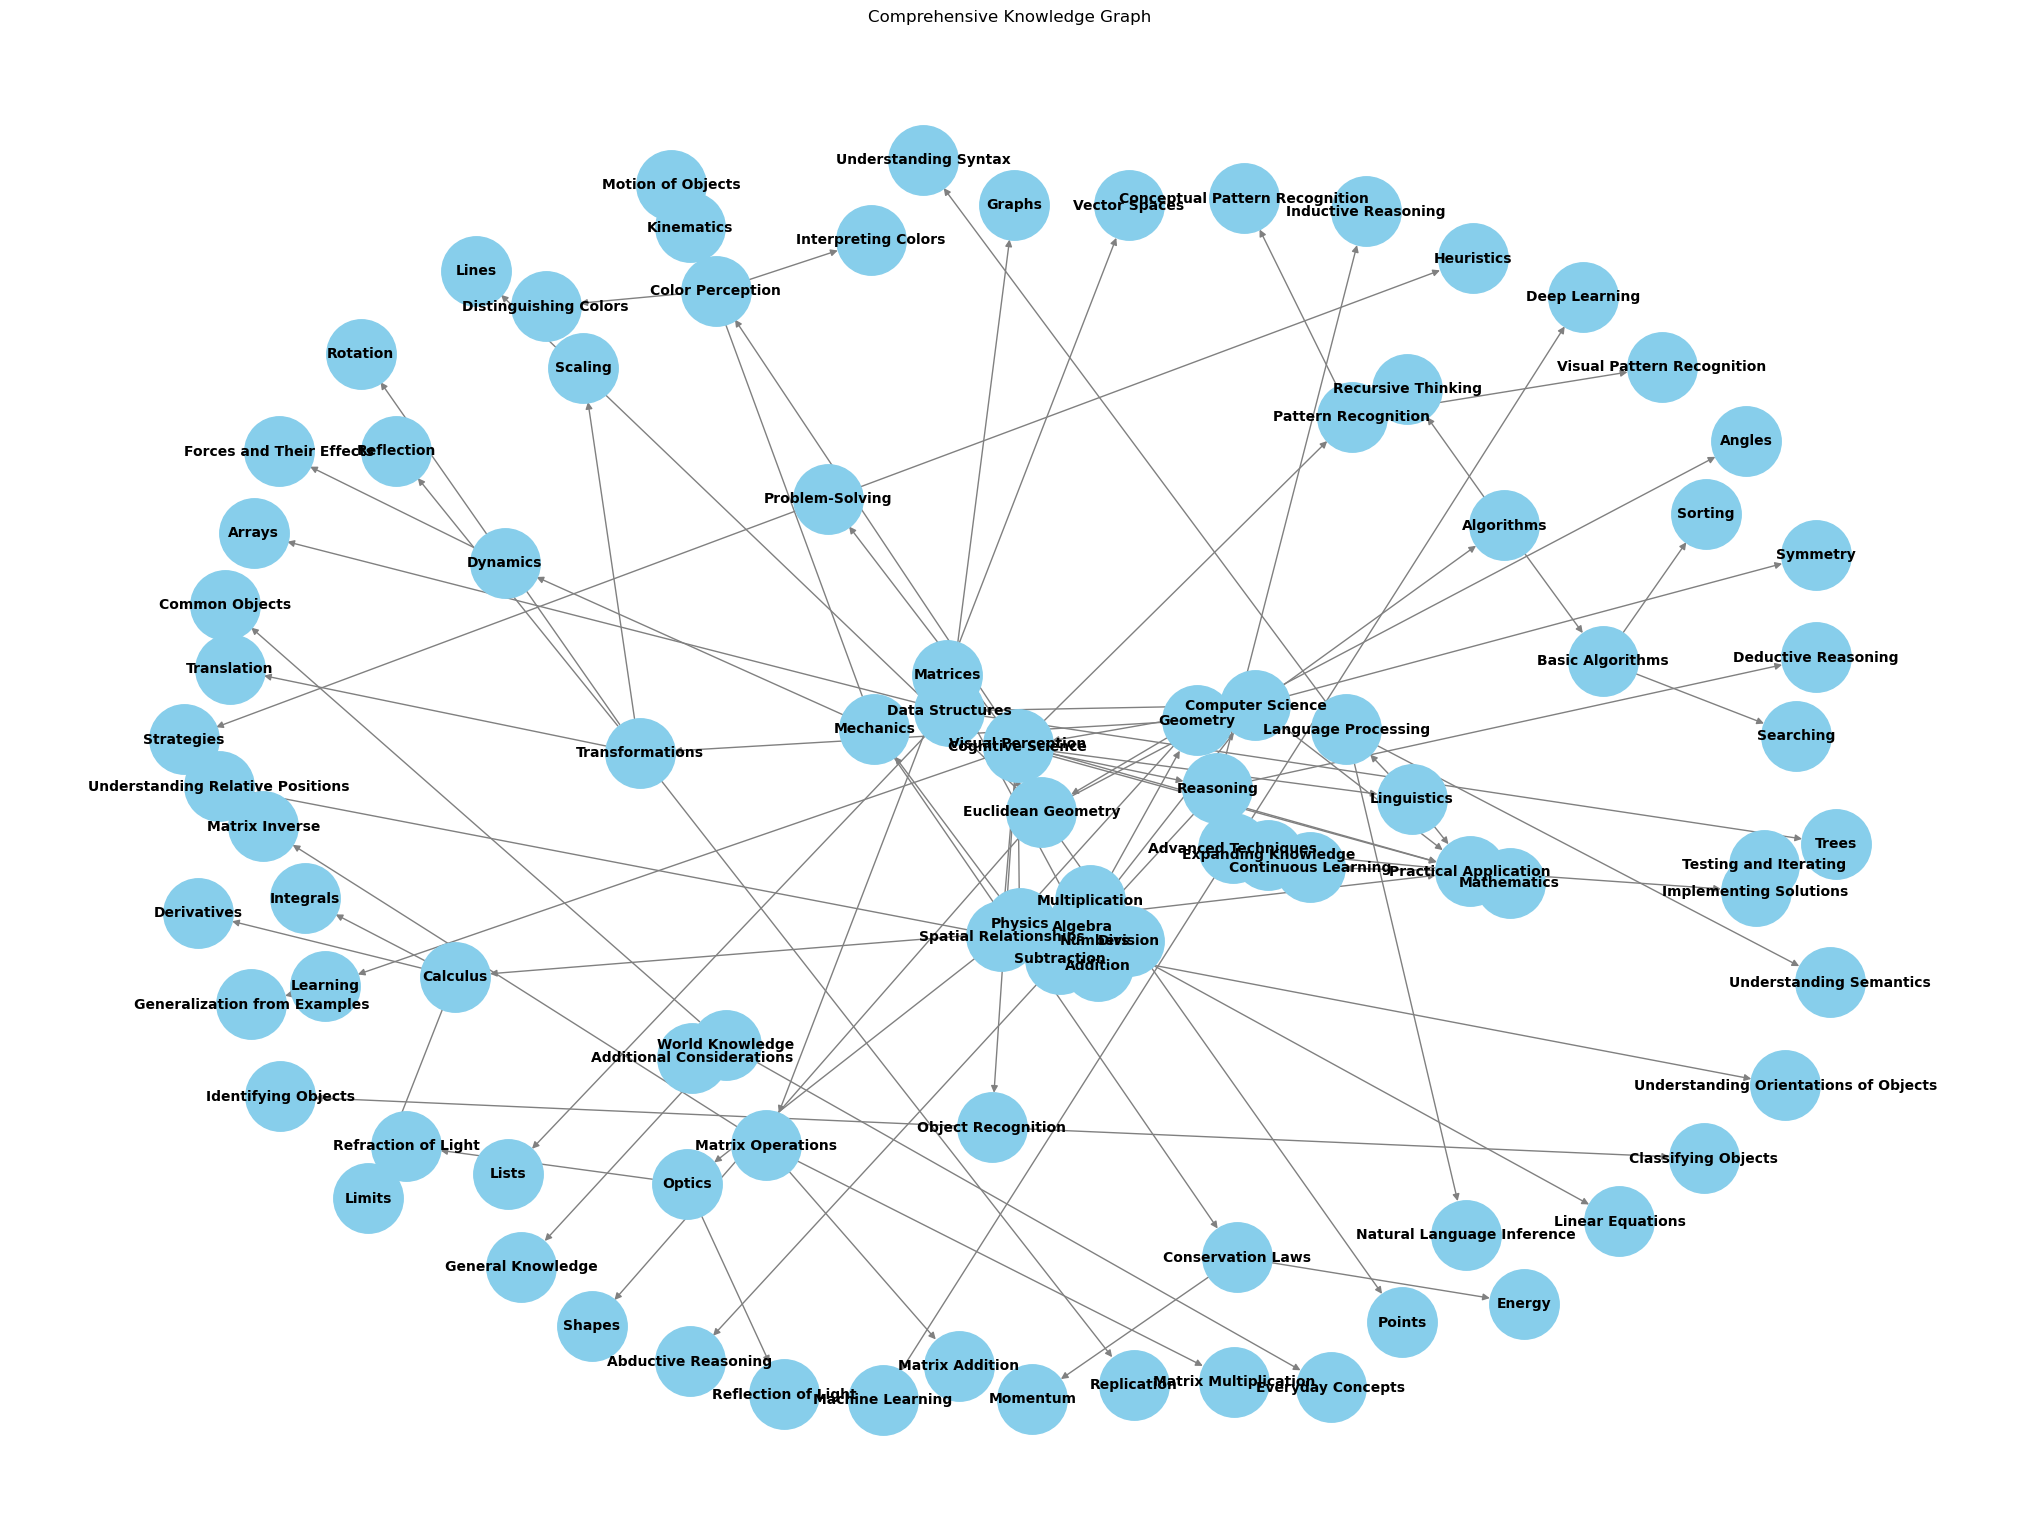

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes based on the knowledge graph
nodes = [
    "Numbers", "Addition", "Subtraction", "Multiplication", "Division", 
    "Algebra", "Linear Equations", "Matrices", "Matrix Operations", 
    "Matrix Addition", "Matrix Multiplication", "Matrix Inverse", 
    "Vector Spaces", "Geometry", "Euclidean Geometry", "Points", 
    "Lines", "Angles", "Shapes", "Transformations", "Translation", 
    "Rotation", "Reflection", "Scaling", "Replication", "Symmetry", 
    "Spatial Relationships", "Calculus", "Limits", "Derivatives", 
    "Integrals", "Physics", "Mechanics", "Kinematics", "Motion of Objects", 
    "Dynamics", "Forces and Their Effects", "Conservation Laws", "Energy", 
    "Momentum", "Optics", "Reflection of Light", "Refraction of Light", 
    "Computer Science", "Algorithms", "Basic Algorithms", "Sorting", 
    "Searching", "Recursive Thinking", "Data Structures", "Arrays", 
    "Lists", "Trees", "Graphs", "Cognitive Science", "Pattern Recognition", 
    "Visual Pattern Recognition", "Conceptual Pattern Recognition", "Reasoning", 
    "Deductive Reasoning", "Inductive Reasoning", "Abductive Reasoning", 
    "Problem-Solving", "Heuristics", "Strategies", "Learning", 
    "Generalization from Examples", "Linguistics", "Language Processing", 
    "Understanding Syntax", "Understanding Semantics", "Natural Language Inference", 
    "Visual Perception", "Object Recognition", "Identifying Objects", 
    "Classifying Objects", "Spatial Relationships", "Understanding Relative Positions", 
    "Understanding Orientations of Objects", "Color Perception", "Distinguishing Colors", 
    "Interpreting Colors", "Additional Considerations", "World Knowledge", 
    "General Knowledge", "Common Objects", "Everyday Concepts",
    "Practical Application", "Implementing Solutions", "Testing and Iterating", 
    "Advanced Techniques", "Machine Learning", "Deep Learning", "Continuous Learning", 
    "Expanding Knowledge"
]

edges = [
    ("Numbers", "Addition"), ("Numbers", "Subtraction"), ("Numbers", "Multiplication"), 
    ("Numbers", "Division"), ("Addition", "Algebra"), ("Subtraction", "Algebra"), 
    ("Multiplication", "Algebra"), ("Division", "Algebra"), ("Algebra", "Linear Equations"), 
    ("Algebra", "Matrices"), ("Matrices", "Matrix Operations"), ("Matrix Operations", "Matrix Addition"), 
    ("Matrix Operations", "Matrix Multiplication"), ("Matrix Operations", "Matrix Inverse"), 
    ("Matrices", "Vector Spaces"), ("Algebra", "Calculus"), ("Geometry", "Euclidean Geometry"), 
    ("Euclidean Geometry", "Points"), ("Euclidean Geometry", "Lines"), ("Euclidean Geometry", "Angles"), 
    ("Euclidean Geometry", "Shapes"), ("Geometry", "Transformations"), ("Transformations", "Translation"), 
    ("Transformations", "Rotation"), ("Transformations", "Reflection"), ("Transformations", "Scaling"), 
    ("Transformations", "Replication"), ("Geometry", "Symmetry"), ("Geometry", "Spatial Relationships"), 
    ("Calculus", "Limits"), ("Calculus", "Derivatives"), ("Calculus", "Integrals"), ("Physics", "Mechanics"), 
    ("Mechanics", "Kinematics"), ("Kinematics", "Motion of Objects"), ("Mechanics", "Dynamics"), 
    ("Dynamics", "Forces and Their Effects"), ("Mechanics", "Conservation Laws"), ("Conservation Laws", "Energy"), 
    ("Conservation Laws", "Momentum"), ("Physics", "Optics"), ("Optics", "Reflection of Light"), 
    ("Optics", "Refraction of Light"), ("Computer Science", "Algorithms"), ("Algorithms", "Basic Algorithms"), 
    ("Basic Algorithms", "Sorting"), ("Basic Algorithms", "Searching"), ("Algorithms", "Recursive Thinking"), 
    ("Computer Science", "Data Structures"), ("Data Structures", "Arrays"), ("Data Structures", "Lists"), 
    ("Data Structures", "Trees"), ("Data Structures", "Graphs"), ("Cognitive Science", "Pattern Recognition"), 
    ("Pattern Recognition", "Visual Pattern Recognition"), ("Pattern Recognition", "Conceptual Pattern Recognition"), 
    ("Cognitive Science", "Reasoning"), ("Reasoning", "Deductive Reasoning"), ("Reasoning", "Inductive Reasoning"), 
    ("Reasoning", "Abductive Reasoning"), ("Cognitive Science", "Problem-Solving"), ("Problem-Solving", "Heuristics"), 
    ("Problem-Solving", "Strategies"), ("Cognitive Science", "Learning"), ("Learning", "Generalization from Examples"), 
    ("Linguistics", "Language Processing"), ("Language Processing", "Understanding Syntax"), 
    ("Language Processing", "Understanding Semantics"), ("Language Processing", "Natural Language Inference"), 
    ("Visual Perception", "Object Recognition"), ("Object Recognition", "Identifying Objects"), 
    ("Object Recognition", "Classifying Objects"), ("Visual Perception", "Spatial Relationships"), 
    ("Spatial Relationships", "Understanding Relative Positions"), ("Spatial Relationships", "Understanding Orientations of Objects"), 
    ("Visual Perception", "Color Perception"), ("Color Perception", "Distinguishing Colors"), 
    ("Color Perception", "Interpreting Colors"), ("Additional Considerations", "World Knowledge"), 
    ("World Knowledge", "General Knowledge"), ("World Knowledge", "Common Objects"), 
    ("World Knowledge", "Everyday Concepts"), ("Numbers", "Algebra"), ("Algebra", "Geometry"), 
    ("Algebra", "Computer Science"), ("Algebra", "Physics"), ("Physics", "Visual Perception"), 
    ("Visual Perception", "Cognitive Science"), ("Cognitive Science", "Linguistics"), ("Computer Science", "Cognitive Science"),
    ("Mathematics", "Practical Application"), ("Physics", "Practical Application"), 
    ("Computer Science", "Practical Application"), ("Cognitive Science", "Practical Application"), 
    ("Linguistics", "Practical Application"), ("Visual Perception", "Practical Application"), 
    ("Practical Application", "Implementing Solutions"), ("Implementing Solutions", "Testing and Iterating"), 
    ("Practical Application", "Advanced Techniques"), ("Advanced Techniques", "Machine Learning"), 
    ("Advanced Techniques", "Deep Learning"), ("Practical Application", "Continuous Learning"), 
    ("Continuous Learning", "Expanding Knowledge"), ("Expanding Knowledge", "Advanced Techniques")
]

G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Plot the graph
plt.figure(figsize=(20, 15))
pos = nx.spring_layout(G, seed=42)  # For consistent layout
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2500, edge_color='gray', font_size=10, font_weight='bold')
plt.title("Comprehensive Knowledge Graph")
plt.show()


In [8]:
from solver_func import Solver2
import numpy as np

# Example usage:
solver = Solver2(G)
matrix1 = np.array([
    [0, 7, 7],
    [7, 7, 7],
    [0, 7, 7]
])
matrix2 = np.array([
    [0, 0, 0, 0, 7, 7, 0, 7, 7],
    [0, 0, 0, 7, 7, 7, 7, 7, 7],
    [0, 0, 0, 0, 7, 7, 0, 7, 7],
    [0, 7, 7, 0, 7, 7, 0, 7, 7],
    [7, 7, 7, 7, 7, 7, 7, 7, 7],
    [0, 7, 7, 0, 7, 7, 0, 7, 7],
    [0, 0, 0, 0, 7, 7, 0, 7, 7],
    [0, 0, 0, 7, 7, 7, 7, 7, 7],
    [0, 0, 0, 0, 7, 7, 0, 7, 7]
])
categories = ['Size Transformations', 'Replication Transformations']
result = solver.solve(matrix1, matrix2, categories)
print(result)

Transformation <lambda> from Replication in Replication Transformations works.
